In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<class 'pandas.core.frame.DataFrame'>
Index: 230736 entries, 230736 to 461471
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      230736 non-null  datetime64[ns]
 1   y       230736 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23741 entries, 0 to 23740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      23741 non-null  datetime64[ns]
 1   y       23741 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 371.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      228 non-null    datetime64[ns]
 1   y       228 non-null    float64       
dtypes: datetime64[ns](1),

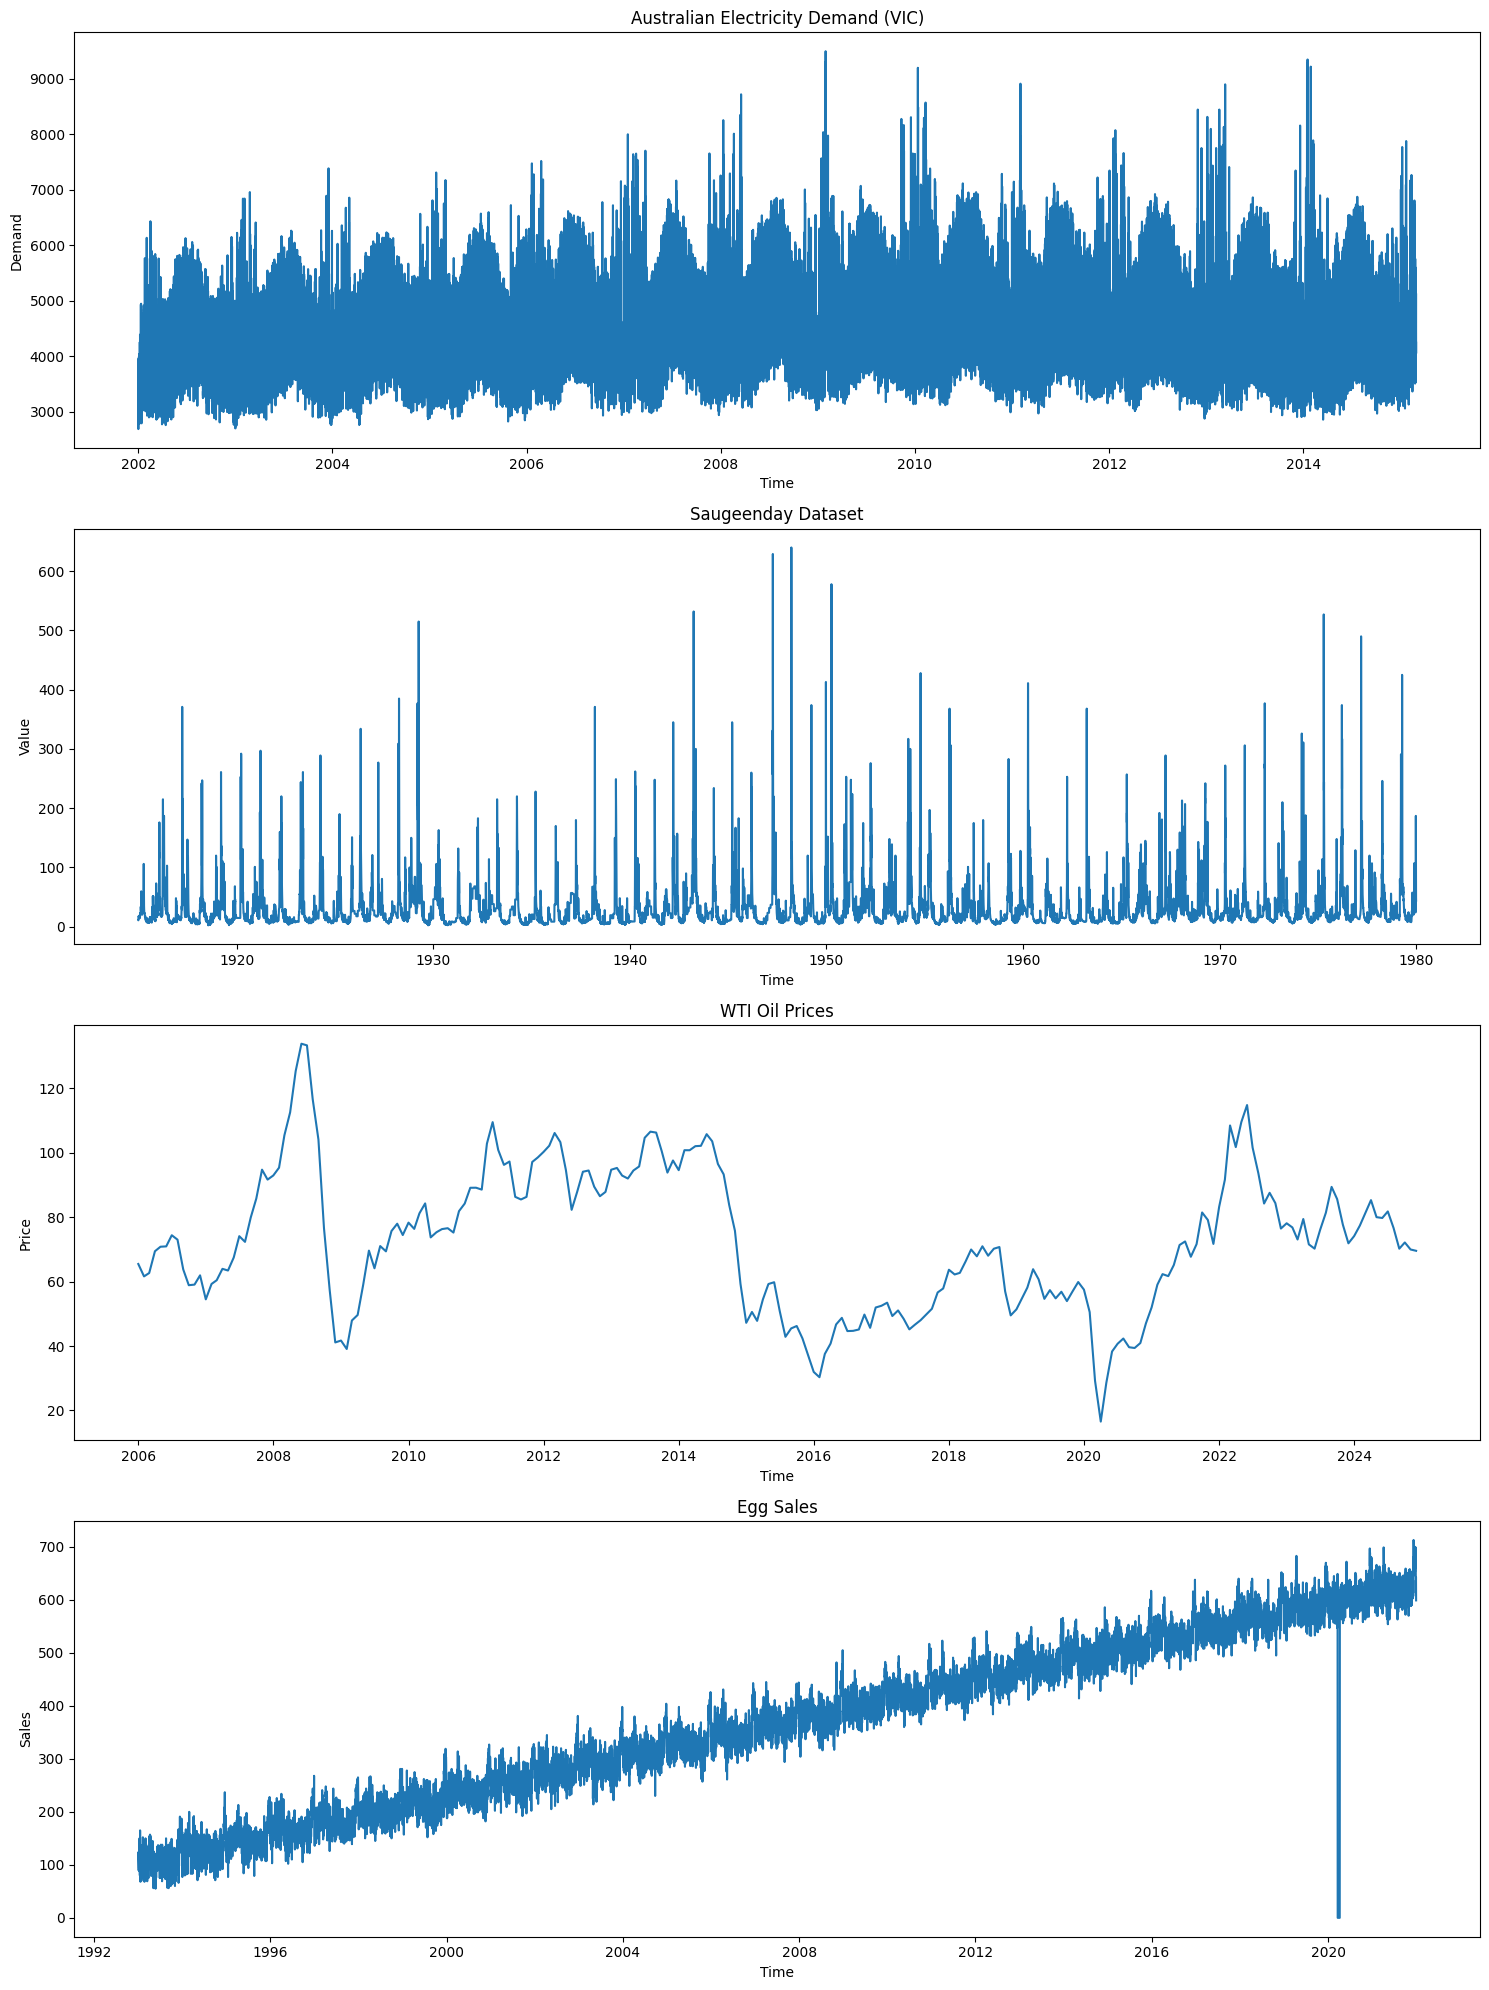

In [34]:
%run "datagetter.ipynb"

- Australian Eletricity Demand

In [31]:
australian_electricity_demand_df.head()

,ds,y
230736,2002-01-01 00:00:00,3535.867064
230737,2002-01-01 00:30:00,3383.499028
230738,2002-01-01 01:00:00,3655.527552
230739,2002-01-01 01:30:00,3510.446636
230740,2002-01-01 02:00:00,3294.697156


In [35]:
dataset_path = './Datasets/'
dataset_name = 'australian_electricity_demand_dataset.tsf'
australian_ds = load_dataset(dataset_path + dataset_name)[0]

# Check the columns first!
print(australian_ds.columns)

# Only after renaming, select the columns!
australian_vic = australian_ds.query("state == 'VIC'").copy()

# Rename the columns
australian_vic = australian_vic.rename(columns={
    'timestamp': 'ds',
    'series_value': 'y'
})

# Now select the relevant columns
df = australian_vic[['ds', 'y']]
df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values('ds')
df.head()

Index(['series_value'], dtype='object')


KeyError: "['ds'] not in index"

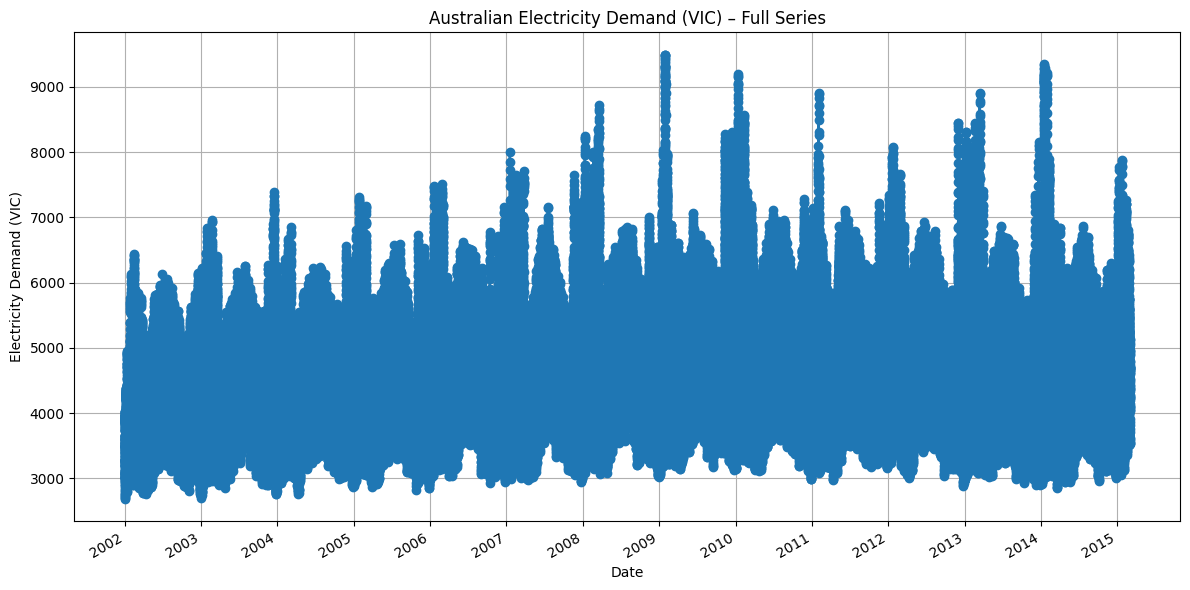

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = australian_electricity_demand_df.copy()
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['y'], marker='o', linestyle='-')
ax.set_xlabel('Date')
ax.set_ylabel('Electricity Demand (VIC)')
ax.set_title('Australian Electricity Demand (VIC) – Full Series')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()
